# First I start with loading a datafile which is a subset of the complete data

# I start with an elastic net regression

In [1]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
import os
os.chdir(os.path.expanduser('~/surfdrive/SamenUniek/Projects/2020_ML_Amsterdam/'))

# read data
data = pd.read_csv('Datasets/SamenUniek_all_Data_w01w03_ML_AMS_2020_randomized_V2.csv')

# make new variable Age, which consists of the age at the timepoint of measuresment 
data['AgeYears'] = np.where(data['visit'] == 1, data['C3.1_AgeMonths'], data['C3.3_AgeMonths'])


In [ ]:
# Show all data columns (wihtout the ...)
#pd.set_option('display.max_columns', None)
#data.head()

In [110]:
# Remove brain measures that are not important
unselected = ["Left.Lateral.Ventricle","Left.Inf.Lat.Vent","X3rd.Ventricle","X4th.Ventricle","Brain.Stem","CSF","Left.VentralDC","Left.vessel","Left.choroid.plexus","Right.Lateral.Ventricle","Right.Inf.Lat.Vent","Right.VentralDC","Right.vessel","Right.choroid.plexus","X5th.Ventricle","WM.hypointensities","Optic.Chiasm","BrainSegVol","BrainSegVolNotVent","BrainSegVolNotVentSurf","MaskVol","BrainSegVol.to.eTIV","MaskVol.to.eTIV","EstimatedTotalIntraCranialVol","SupraTentorialVol","SupraTentorialVolNotVent","SupraTentorialVolNotVentVox"]
var_inc = [i for i in data.columns if i not in unselected]
print(var_inc)
data = data[var_inc]
print(data)

for i, col in enumerate(data.columns): 
    print(i,col)
    


['ChildID', 'FamilyID', 'GenderTwin', 'C3.1_AgeMonths', 'C3.3_AgeMonths', 'C3.1_DNA_Zygosity', 'C3.3_SRS_TotalScore_18', 'EstimatedIQ', 'SocioEconomicStatus', 'C3.3_Stop_Total_CorrectGO', 'C3.3_Stop_Total_CorrectNOGO', 'C3.3_Stop_Total_Mean_corGO_RT', 'visit', 'AgeYears', 'Left.Cerebellum.White.Matter', 'Left.Cerebellum.Cortex', 'Left.Thalamus.Proper', 'Left.Caudate', 'Left.Putamen', 'Left.Pallidum', 'Left.Hippocampus', 'Left.Amygdala', 'Left.Accumbens.area', 'Right.Cerebellum.White.Matter', 'Right.Cerebellum.Cortex', 'Right.Thalamus.Proper', 'Right.Caudate', 'Right.Putamen', 'Right.Pallidum', 'Right.Hippocampus', 'Right.Amygdala', 'Right.Accumbens.area', 'CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior', 'lhCortexVol', 'rhCortexVol', 'CortexVol', 'SubCortGrayVol', 'TotalGrayVol', 'lh_caudalanteriorcingulate_area', 'lh_caudalmiddlefrontal_area', 'lh_cuneus_area', 'lh_entorhinal_area', 'lh_fusiform_area', 'lh_inferiorparietal_area', 'lh_inferiortemporal_

In [111]:
data.describe()
data

,ChildID,FamilyID,GenderTwin,C3.1_AgeMonths,C3.3_AgeMonths,C3.1_DNA_Zygosity,C3.3_SRS_TotalScore_18,EstimatedIQ,SocioEconomicStatus,C3.3_Stop_Total_CorrectGO,...,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,ChildID2
0,601,6,boys,89.0,114.0,DZ,2.0,87.5,high SES,99.342105,...,3.894,2.957,3.253,2.828,3.209,3.008,3.361,3.458,2.94654,50602
1,701,7,boys,89.0,113.0,DZ,NaN,97.5,middle SES,99.342105,...,3.815,2.899,3.446,2.881,3.325,3.192,3.033,3.708,3.04415,22301
2,901,9,boys,87.0,111.0,MZ,2.0,97.5,middle SES,92.105263,...,4.122,2.822,3.407,2.614,2.960,2.976,2.199,3.382,2.90963,93201
3,902,9,boys,87.0,111.0,MZ,3.0,95.0,middle SES,96.710526,...,3.659,2.912,3.433,2.418,3.051,2.969,2.475,3.404,2.87815,100302
4,1301,13,boys,92.0,116.0,MZ,2.0,82.5,middle SES,99.342105,...,2.953,2.708,2.741,2.156,2.129,2.026,1.854,2.841,2.45279,9602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,115702,1157,girls,87.0,111.0,DZ,6.0,97.5,middle SES,83.552632,...,2.533,2.705,3.208,2.394,2.595,2.871,3.691,3.885,2.52185,18501
585,116401,1164,girls,86.0,109.0,MZ,11.0,82.5,high SES,94.078947,...,2.494,2.717,2.921,2.456,1.783,2.833,2.611,3.871,2.43870,22302
586,116402,1164,girls,86.0,109.0,MZ,8.0,100.0,high SES,99.342105,...,2.612,2.809,3.125,2.064,1.757,2.276,2.265,3.481,2.35131,6402
587,117401,1174,girls,NaN,137.0,NaN,6.0,NaN,middle SES,94.736842,...,3.383,2.964,3.265,2.588,2.904,2.987,3.003,3.207,2.81043,46401


In [112]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [113]:
np.unique(data['AgeYears'])

array([ 84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105.,
       106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
       117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
       128., 129., 130., 131., 132., 133., 134., 137., 140.])

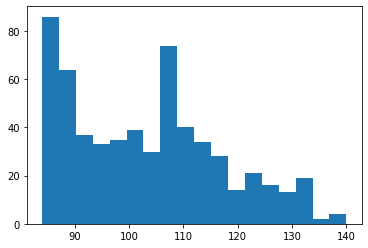

In [114]:
import matplotlib.pyplot as plt
plt.hist(data['AgeYears'],bins=18)
plt.show()

In [41]:
data

,ChildID,FamilyID,GenderTwin,C3.1_AgeMonths,C3.3_AgeMonths,C3.1_DNA_Zygosity,C3.3_SRS_TotalScore_18,EstimatedIQ,SocioEconomicStatus,C3.3_Stop_Total_CorrectGO,...,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,ChildID2
0,601,6,boys,89.0,114.0,DZ,2.0,87.5,high SES,99.342105,...,3.894,2.957,3.253,2.828,3.209,3.008,3.361,3.458,2.94654,50602
1,701,7,boys,89.0,113.0,DZ,NaN,97.5,middle SES,99.342105,...,3.815,2.899,3.446,2.881,3.325,3.192,3.033,3.708,3.04415,22301
2,901,9,boys,87.0,111.0,MZ,2.0,97.5,middle SES,92.105263,...,4.122,2.822,3.407,2.614,2.960,2.976,2.199,3.382,2.90963,93201
3,902,9,boys,87.0,111.0,MZ,3.0,95.0,middle SES,96.710526,...,3.659,2.912,3.433,2.418,3.051,2.969,2.475,3.404,2.87815,100302
4,1301,13,boys,92.0,116.0,MZ,2.0,82.5,middle SES,99.342105,...,2.953,2.708,2.741,2.156,2.129,2.026,1.854,2.841,2.45279,9602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,115702,1157,girls,87.0,111.0,DZ,6.0,97.5,middle SES,83.552632,...,2.533,2.705,3.208,2.394,2.595,2.871,3.691,3.885,2.52185,18501
585,116401,1164,girls,86.0,109.0,MZ,11.0,82.5,high SES,94.078947,...,2.494,2.717,2.921,2.456,1.783,2.833,2.611,3.871,2.43870,22302
586,116402,1164,girls,86.0,109.0,MZ,8.0,100.0,high SES,99.342105,...,2.612,2.809,3.125,2.064,1.757,2.276,2.265,3.481,2.35131,6402
587,117401,1174,girls,NaN,137.0,NaN,6.0,NaN,middle SES,94.736842,...,3.383,2.964,3.265,2.588,2.904,2.987,3.003,3.207,2.81043,46401


# Run PCA analysis


In [115]:
# we used the whole dataset to find components using PCA because it is a separate question from the SRS prediction model
# this result will be fed into the prediction model
from sklearn.preprocessing import StandardScaler
brainfeatures = data.columns[15:197] # Separating out the features
x = data.loc[:, brainfeatures].values # Separating out the target
y = data.loc[:,['C3.3_SRS_TotalScore_18']].values # Standardizing the features
x = StandardScaler().fit_transform(x)

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)
print(principalComponents)
#principalDf = pd.DataFrame(data = principalComponents
 #            , columns = ['principal component 1', 'principal component 2'])
principalComponents.shape
principalData = pd.DataFrame(data = principalComponents)


[[ 1.25659393  7.14420061  1.02877477 ...  1.21388757 -0.49088137
   0.17835392]
 [-6.76912225  2.82688833  1.60038047 ...  1.64301852  1.2785459
   0.49469436]
 [-6.58966148 -1.41856139  2.30585043 ... -0.93045261 -0.40348967
  -0.78970591]
 ...
 [11.90994959 -4.56460853  1.78127333 ... -1.25527915  0.33031573
  -2.1682104 ]
 [ 3.16714161  5.35045174 -2.60787585 ...  0.41063322 -0.94134362
  -0.03033443]
 [ 2.7316859   5.00357555 -2.41846547 ... -0.63829808 -1.2136543
   0.44280287]]


In [117]:
#Merge data back to Demographics
finalData = pd.concat([principalData, data[['AgeYears','GenderTwin']]], axis = 1)


In [118]:
from sklearn.model_selection import train_test_split

# Autoencoder

In [266]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model


In [345]:
# Select train data HC only
# Make test and train dataset that is balanced for SRS score, gender, and have same family members together
from sklearn.model_selection import train_test_split
X_srs = data[np.isfinite(data['C3.3_SRS_TotalScore_18'])].copy()
#print(X_srs)
X_srs = X_srs[X_srs['visit'] == 1].copy()# select data of time point 1 only 

#len(X_srs)

# We want same family members together in test or train
X = X_srs.drop_duplicates(subset = 'FamilyID').copy()

# make a binary value for SRS, so the train and test data will be balanced
X['SRS_binary'] = X['C3.3_SRS_TotalScore_18'] > 7

# select data from low SRS scores only = HC
X_TD = X[X['SRS_binary'] == False] # Typical development
X_AD = X[X['SRS_binary'] == True] # Atypical development

#y = X[['GenderTwin', 'SRS_binary']] # make variable for the categories that youd like to balance
y = X_TD[['GenderTwin']] # make variable for the categories that youd like to balance

X_train, X_test, y_train, y_test = train_test_split(X_TD, y, test_size=0.33, random_state=42, stratify=y)

In [354]:
# merge high SRS (Atypical Development) to test set including typical development
X_test = X_test.append(X_AD)

# merge for y_test data
y_test_AD = X_AD[['GenderTwin']]
y_test = y_test.append(y_test_AD)

print(X_train.shape)
print(y_train.shape)

(112, 156)
(96, 1)


In [349]:
# Match family id's selceted with X_train and match to full set X_srs
arraytrain=X_train.loc[:, 'FamilyID'].tolist()
len(arraytrain)
# selecting rows based on condition
X_srs_train = X_srs[X_srs['FamilyID'].isin(arraytrain)]

# Select brain data and scale
brainfeatures = X_srs_train.columns[15:197] # Separating out the features
X_srs_brain_train = X_srs_train.loc[:, brainfeatures].values # Separating out the target
X_srs_brain_train = StandardScaler().fit_transform(X_srs_brain_train)

X_srs_brain_train_Df = pd.DataFrame(data = X_srs_brain_train)

print(X_srs_brain_train_Df)


In [350]:
# Match family id's selceted with X_test and match to full set X_srs
arraytest=X_test.loc[:, 'FamilyID'].tolist()
arraytest
# selecting rows based on condition
X_srs_test = X_srs[X_srs['FamilyID'].isin(arraytest)]

# Build model

In [376]:
# first devide X_srs_brain_train in a train and validating dataset
    
X_train, X_val = train_test_split(X_srs_brain_train, test_size=0.3)


In [438]:
# model define
# reduce to 40 features
encoding_dim = 15

# make input layer
input_df = Input(shape=(156,))
encoded = Dense(encoding_dim,activation='relu')(input_df)
decoded = Dense(156)(encoded)

# encoder
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

#train model
history = autoencoder.fit(X_train, X_train,
                epochs=500, # this was 250
                batch_size=50, # this was 256
                shuffle=True,
                validation_data=(X_val, X_val))


Train on 112 samples, validate on 48 samples
Epoch 1/500
112/112 [==============================] - 0s 3ms/sample - loss: 1.1305 - val_loss: 1.0749
Epoch 2/500
112/112 [==============================] - 0s 178us/sample - loss: 1.0860 - val_loss: 1.0512
Epoch 3/500
112/112 [==============================] - 0s 120us/sample - loss: 1.0586 - val_loss: 1.0361
Epoch 4/500
112/112 [==============================] - 0s 149us/sample - loss: 1.0396 - val_loss: 1.0249
Epoch 5/500
112/112 [==============================] - 0s 115us/sample - loss: 1.0230 - val_loss: 1.0146
Epoch 6/500
112/112 [==============================] - 0s 174us/sample - loss: 1.0081 - val_loss: 1.0035
Epoch 7/500
112/112 [==============================] - 0s 152us/sample - loss: 0.9932 - val_loss: 0.9906
Epoch 8/500
112/112 [==============================] - 0s 109us/sample - loss: 0.9783 - val_loss: 0.9757
Epoch 9/500
112/112 [==============================] - 0s 103us/sample - loss: 0.9614 - val_loss: 0.9593
Epoch 10/500

Epoch 78/500
112/112 [==============================] - 0s 177us/sample - loss: 0.4121 - val_loss: 0.5239
Epoch 79/500
112/112 [==============================] - 0s 115us/sample - loss: 0.4108 - val_loss: 0.5235
Epoch 80/500
112/112 [==============================] - 0s 138us/sample - loss: 0.4097 - val_loss: 0.5231
Epoch 81/500
112/112 [==============================] - 0s 117us/sample - loss: 0.4084 - val_loss: 0.5225
Epoch 82/500
112/112 [==============================] - 0s 152us/sample - loss: 0.4073 - val_loss: 0.5218
Epoch 83/500
112/112 [==============================] - 0s 138us/sample - loss: 0.4064 - val_loss: 0.5210
Epoch 84/500
112/112 [==============================] - 0s 112us/sample - loss: 0.4052 - val_loss: 0.5203
Epoch 85/500
112/112 [==============================] - 0s 129us/sample - loss: 0.4041 - val_loss: 0.5197
Epoch 86/500
112/112 [==============================] - 0s 145us/sample - loss: 0.4033 - val_loss: 0.5192
Epoch 87/500
112/112 [========================

Epoch 155/500
112/112 [==============================] - 0s 133us/sample - loss: 0.3415 - val_loss: 0.4873
Epoch 156/500
112/112 [==============================] - 0s 129us/sample - loss: 0.3408 - val_loss: 0.4872
Epoch 157/500
112/112 [==============================] - 0s 126us/sample - loss: 0.3401 - val_loss: 0.4872
Epoch 158/500
112/112 [==============================] - 0s 152us/sample - loss: 0.3395 - val_loss: 0.4870
Epoch 159/500
112/112 [==============================] - 0s 142us/sample - loss: 0.3387 - val_loss: 0.4864
Epoch 160/500
112/112 [==============================] - 0s 153us/sample - loss: 0.3380 - val_loss: 0.4860
Epoch 161/500
112/112 [==============================] - 0s 150us/sample - loss: 0.3374 - val_loss: 0.4858
Epoch 162/500
112/112 [==============================] - 0s 121us/sample - loss: 0.3367 - val_loss: 0.4859
Epoch 163/500
112/112 [==============================] - 0s 135us/sample - loss: 0.3361 - val_loss: 0.4857
Epoch 164/500
112/112 [==============

112/112 [==============================] - 0s 125us/sample - loss: 0.3014 - val_loss: 0.4762
Epoch 232/500
112/112 [==============================] - 0s 117us/sample - loss: 0.3012 - val_loss: 0.4760
Epoch 233/500
112/112 [==============================] - 0s 121us/sample - loss: 0.3009 - val_loss: 0.4753
Epoch 234/500
112/112 [==============================] - 0s 128us/sample - loss: 0.3004 - val_loss: 0.4744
Epoch 235/500
112/112 [==============================] - 0s 132us/sample - loss: 0.2999 - val_loss: 0.4740
Epoch 236/500
112/112 [==============================] - 0s 132us/sample - loss: 0.2995 - val_loss: 0.4740
Epoch 237/500
112/112 [==============================] - 0s 146us/sample - loss: 0.2991 - val_loss: 0.4742
Epoch 238/500
112/112 [==============================] - 0s 129us/sample - loss: 0.2987 - val_loss: 0.4744
Epoch 239/500
112/112 [==============================] - 0s 122us/sample - loss: 0.2983 - val_loss: 0.4743
Epoch 240/500
112/112 [============================

112/112 [==============================] - 0s 122us/sample - loss: 0.2799 - val_loss: 0.4716
Epoch 308/500
112/112 [==============================] - 0s 119us/sample - loss: 0.2800 - val_loss: 0.4715
Epoch 309/500
112/112 [==============================] - 0s 117us/sample - loss: 0.2796 - val_loss: 0.4711
Epoch 310/500
112/112 [==============================] - 0s 131us/sample - loss: 0.2794 - val_loss: 0.4710
Epoch 311/500
112/112 [==============================] - 0s 140us/sample - loss: 0.2793 - val_loss: 0.4708
Epoch 312/500
112/112 [==============================] - 0s 133us/sample - loss: 0.2789 - val_loss: 0.4704
Epoch 313/500
112/112 [==============================] - 0s 123us/sample - loss: 0.2788 - val_loss: 0.4702
Epoch 314/500
112/112 [==============================] - 0s 126us/sample - loss: 0.2784 - val_loss: 0.4704
Epoch 315/500
112/112 [==============================] - 0s 125us/sample - loss: 0.2783 - val_loss: 0.4707
Epoch 316/500
112/112 [============================

112/112 [==============================] - 0s 137us/sample - loss: 0.2692 - val_loss: 0.4715
Epoch 384/500
112/112 [==============================] - 0s 108us/sample - loss: 0.2690 - val_loss: 0.4716
Epoch 385/500
112/112 [==============================] - 0s 132us/sample - loss: 0.2690 - val_loss: 0.4716
Epoch 386/500
112/112 [==============================] - 0s 116us/sample - loss: 0.2689 - val_loss: 0.4716
Epoch 387/500
112/112 [==============================] - 0s 150us/sample - loss: 0.2689 - val_loss: 0.4717
Epoch 388/500
112/112 [==============================] - 0s 115us/sample - loss: 0.2690 - val_loss: 0.4718
Epoch 389/500
112/112 [==============================] - 0s 128us/sample - loss: 0.2688 - val_loss: 0.4719
Epoch 390/500
112/112 [==============================] - 0s 139us/sample - loss: 0.2686 - val_loss: 0.4720
Epoch 391/500
112/112 [==============================] - 0s 108us/sample - loss: 0.2685 - val_loss: 0.4723
Epoch 392/500
112/112 [============================

112/112 [==============================] - 0s 124us/sample - loss: 0.2638 - val_loss: 0.4745
Epoch 460/500
112/112 [==============================] - 0s 130us/sample - loss: 0.2638 - val_loss: 0.4743
Epoch 461/500
112/112 [==============================] - 0s 121us/sample - loss: 0.2638 - val_loss: 0.4743
Epoch 462/500
112/112 [==============================] - 0s 117us/sample - loss: 0.2637 - val_loss: 0.4744
Epoch 463/500
112/112 [==============================] - 0s 142us/sample - loss: 0.2636 - val_loss: 0.4747
Epoch 464/500
112/112 [==============================] - 0s 108us/sample - loss: 0.2636 - val_loss: 0.4746
Epoch 465/500
112/112 [==============================] - 0s 134us/sample - loss: 0.2636 - val_loss: 0.4743
Epoch 466/500
112/112 [==============================] - 0s 117us/sample - loss: 0.2634 - val_loss: 0.4744
Epoch 467/500
112/112 [==============================] - 0s 119us/sample - loss: 0.2634 - val_loss: 0.4746
Epoch 468/500
112/112 [============================

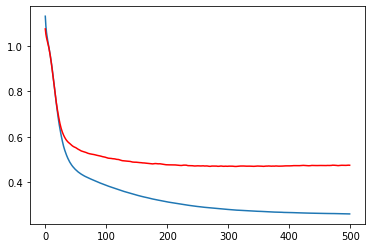

In [439]:
# plot learning curves to see whether there is a plateau
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')


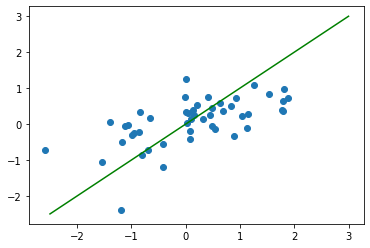

In [458]:
# 
#encoded_X_train = encoder.predict(X_train)
#encoded_X_val = encoder.predict(X_val)
reconstructed_X_val = autoencoder.predict(X_val)
#print(reconstructed_X_val[,0])
#print(X_val[,0])
i=7
#plt.scatter(X_val[i,:],reconstructed_X_val[i,:]) # per brain measures
plt.scatter(X_val[:,i],reconstructed_X_val[:,i]) # per individual
plt.plot((-2.5,3),(-2.5,3),color='green')

In [462]:
# Test this on the test data
# Select brain data and scale from test data
brainfeatures = X_srs_test.columns[15:197] # Separating out the features
X_srs_brain_test = X_srs_test.loc[:, brainfeatures].values # Separating out the target
X_srs_brain_test = StandardScaler().fit_transform(X_srs_brain_test)

X_srs_brain_test_Df = pd.DataFrame(data = X_srs_brain_test)

#print(X_srs_brain_test_Df)

reconstructed_X_test = autoencoder.predict(X_srs_brain_test)


In [471]:
# Estimate MSE for each participants X_srs_brain_test and reconstructed_X_test
rms = []
for i in range(len(reconstructed_X_test)):
    rms.append(np.sqrt(np.sum((reconstructed_X_test[i] - X_srs_brain_test[i])**2)))
rms = np.array(rms)


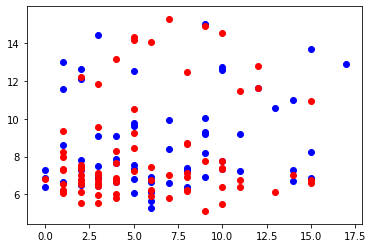

In [496]:
# Regress MSE to SRS data
X_srs_test_rms = X_srs_test.copy()
X_srs_test_rms['rms'] = rms
boys = np.where(X_srs_test_rms['GenderTwin'] == 'boys')
girls = np.where(X_srs_test_rms['GenderTwin'] == 'girls')

plt.scatter(X_srs_test_rms.iloc[boys]['C3.3_SRS_TotalScore_18'],X_srs_test_rms.iloc[boys]['rms'],color="blue") #
plt.scatter(X_srs_test_rms.iloc[girls]['C3.3_SRS_TotalScore_18'],X_srs_test_rms.iloc[girls]['rms'],color="red") #
#plt.scatter(X_srs_test_rms['C3.3_SRS_TotalScore_18'],X_srs_test_rms['rms']) #

#plt.scatter(X_srs_test_rms['GenderTwin'],X_srs_test_rms['rms']) # 
#plt.scatter(X_srs_test_rms['AgeYears'],X_srs_test_rms['rms']) # 



# Split file in train and test dataset and stratify the split

In [185]:
# Convert boys/girls to true/false
finalData['GenderTwin']=finalData['GenderTwin'] == 'boys'
#print(finalData)
finalData.shape
X=finalData[finalData.columns[0:25]]
X = pd.concat([X, finalData[['GenderTwin']]], axis = 1)

#X=finalData[0:20]
#print(X)
#X=data[['GenderTwin','CortexVol','SubCortGrayVol','TotalGrayVol']]
len(X)
y=finalData[['AgeYears','GenderTwin']]
#print(y)

     AgeYears  GenderTwin
0        89.0       False
1        89.0       False
2        87.0       False
3        87.0       False
4        92.0       False
..        ...         ...
584     111.0       False
585     109.0       False
586     109.0       False
587     137.0       False
588     137.0       False

[589 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [225]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=X['GenderTwin'])

In [228]:
#remove gender from data frames

y_train = y_train['AgeYears']
y_test = y_test['AgeYears']
#print(y_train)

X_train=X_train[X_train.columns[0:25]]
#print(X_train)
X_test=X_test[X_test.columns[0:25]]


# Elastic net model

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [234]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
#print(coeff_df)

    Coefficient
0      0.177970
1     -0.560235
2     -0.299501
3      0.273003
4      0.597691
5      0.191963
6     -2.589682
7      0.434193
8      0.192783
9      1.146722
10     1.018249
11     1.444984
12    -0.784464
13     1.024284
14    -0.526136
15     0.019939
16     0.961069
17     0.288597
18     0.869734
19     2.101976
20     0.001274
21    -0.753715
22     0.658887
23    -0.776340
24    -0.114117


In [236]:
y_pred = regressor.predict(X_test)

In [237]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [238]:
#df.plot(kind='bar',figsize=(50,50))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()

In [239]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mean_squared_error(y_test, y_pred)

166.02505696135964

In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

elastic=ElasticNet(normalize=True, max_iter=10000)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [241]:
search.fit(X_train, y_train)
search.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.001, 'l1_ratio': 0.2}

In [242]:
np.logspace(-5,2,8)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [243]:
abs(search.best_score_)

175.52821434090313

In [244]:
elastic=ElasticNet(normalize=True,alpha=0.1,l1_ratio=0.6)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [245]:
coeff_df = pd.DataFrame(elastic.coef_, X_train.columns, columns=['Coefficient'])  
print(coeff_df)

    Coefficient
0      0.001660
1     -0.015051
2     -0.000000
3      0.000000
4      0.000000
5      0.000000
6     -0.109036
7      0.000000
8      0.000000
9      0.016235
10     0.004201
11     0.025497
12    -0.000000
13     0.008210
14    -0.000000
15    -0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.071463
20     0.000000
21    -0.000000
22     0.000000
23    -0.000000
24     0.000000


In [246]:
#evalueer model op je training set, zie dat alleen intercept er is
y_pred = elastic.predict(X_train) 
print(y_pred)

[103.38975831 103.42970669 103.50767855 103.36969657 103.41409453
 103.65456709 103.76647965 103.29373764 103.43849008 103.14437749
 103.21524468 103.30472924 103.5954361  103.14429243 103.01956283
 103.0678917  103.02014269 103.41503836 103.6896378  103.34631557
 103.44847474 103.44901357 103.38426067 103.60455855 103.30644587
 103.50311025 103.13026685 103.66544585 103.00685623 102.97410744
 103.56231671 103.36770158 103.2306157  103.43474134 103.7627895
 103.09571267 103.14539946 103.25882762 103.40774591 103.42803399
 103.29350699 103.63683426 103.5193625  103.25400522 103.33165171
 103.67890241 103.40780073 103.44093054 103.56391859 103.49969417
 103.51333895 103.27036058 103.279982   103.71953888 103.39691249
 103.64103775 103.43345096 103.4304395  103.74177615 103.28034994
 103.52458645 102.91199766 103.46356032 103.05754878 103.00334707
 103.41468894 102.90808227 103.42374541 103.26253204 103.49933024
 103.44451523 103.39644389 103.53053966 103.36323455 103.35941
 103.52322455 

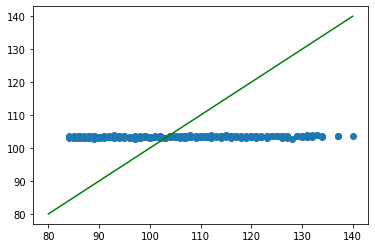

In [247]:
plt.scatter(y_train,y_pred)
plt.plot((80,140),(80,140),color='green')

# From here I started with a random forest regression

In [157]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['AgeYears'])

# Remove the labels from the features
# axis 1 refers to the columns
#data2= data.drop('AgeYears', axis = 1)

##Ik heb labels als labels en X als dataframe, ik rename X naar features



In [159]:
features = X
features


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,GenderTwin
0,1.256594,7.144201,1.028775,0.208576,0.613567,-0.636847,3.018764,-0.944426,-1.810257,0.702187,...,-1.291098,1.070177,-0.693139,-1.765233,-0.830774,-0.114889,1.213888,-0.490881,0.178354,True
1,-6.769122,2.826888,1.600380,-0.093221,1.745067,-1.161000,2.231682,0.853536,0.664507,0.619442,...,-0.391207,-0.324175,-1.455109,-0.521784,1.275971,0.688323,1.643019,1.278546,0.494694,True
2,-6.589661,-1.418561,2.305850,-1.284248,0.010669,0.909764,0.869030,-0.548419,1.040086,-1.083769,...,-0.168749,-0.254962,-1.273319,-0.188134,-1.560959,0.956928,-0.930453,-0.403490,-0.789706,True
3,-5.641689,-0.801669,1.952305,-0.525579,-1.178766,0.210104,1.076218,-0.722336,1.836155,-0.868958,...,-0.806319,-0.576657,-0.623178,-0.021198,0.590005,0.775686,-0.296009,0.363189,-0.892605,True
4,9.686448,-2.237390,-2.887076,2.397236,-0.756279,-5.875614,1.997932,3.435443,0.779190,-1.832852,...,-0.183628,1.224308,-2.703452,-0.502632,0.168188,1.001514,-1.753117,0.863638,0.485058,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,13.471546,1.066882,2.395232,5.268390,-4.084004,-2.416234,-2.644794,-3.951302,0.239417,1.126321,...,0.327234,-0.483049,1.725948,-1.672650,1.426650,-4.427054,3.039489,-0.262568,-1.532696,False
585,10.180158,-1.192308,3.638355,2.288925,1.838815,-2.779988,-0.282069,1.581031,-1.985017,-3.026597,...,0.981899,0.409662,0.430294,1.387044,0.790882,4.735767,0.124829,-1.133418,-2.188034,False
586,11.909950,-4.564609,1.781273,0.493676,0.148429,-4.443186,-0.363214,2.156111,-1.222666,-1.545118,...,-0.434781,0.718020,-1.479188,1.755127,0.814415,2.325652,-1.255279,0.330316,-2.168210,False
587,3.167142,5.350452,-2.607876,-0.482061,0.099620,-0.340658,-2.181144,0.096971,-0.252467,0.194439,...,-1.757788,0.325350,1.247998,0.733659,0.616078,-0.499003,0.410633,-0.941344,-0.030334,False


In [160]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets


In [161]:
features

array([[1.2565939321833275, 7.144200609532169, 1.0287747712098818, ...,
        -0.4908813668032425, 0.17835392078026616, True],
       [-6.769122250860017, 2.826888327122429, 1.6003804704123406, ...,
        1.278545903695918, 0.4946943586545841, True],
       [-6.589661478207608, -1.4185613936247228, 2.305850428337603, ...,
        -0.4034896677179943, -0.7897059103849238, True],
       ...,
       [11.909949592557274, -4.5646085250412325, 1.781273330432657, ...,
        0.33031573193927855, -2.1682104041913317, False],
       [3.1671416088075293, 5.350451738057413, -2.6078758547828995, ...,
        -0.9413436224976102, -0.030334427206953427, False],
       [2.731685903284489, 5.0035755451658375, -2.418465472941391, ...,
        -1.213654299637033, 0.44280287073846536, False]], dtype=object)

In [162]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 42)

In [163]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [164]:
#Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'years')

##Dus 1 jaar is ongeveer 1/8.66 * 100 -> gemiddelde fout in procenten als je het gemiddelde neemt (het naieve model)
##Dat is beter dan dit model... (oeps / auch)

Mean Absolute Error: 11.31 years


In [166]:
rf.feature_importances_

array([0.06908421, 0.05188557, 0.02877403, 0.04506451, 0.02901732,
       0.03868381, 0.13028161, 0.05517555, 0.03167031, 0.03734881,
       0.04224326, 0.02877408, 0.03669556, 0.03218293, 0.02225422,
       0.02223484, 0.03524535, 0.022184  , 0.0319962 , 0.05204138,
       0.02131741, 0.04436245, 0.02638556, 0.0246581 , 0.03831936,
       0.00211958])

In [167]:
feature_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 'GenderTwin']

In [168]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.63 %.


In [148]:
print(predictions)


[8.46508333 9.16491667 8.44008333 8.16783333 9.51441667 8.24591667
 7.91516667 8.24308333 8.608      8.31325    8.81525    7.926
 8.66316667 8.62216667 9.05225    7.90708333 9.00083333 8.81375
 8.53725    8.38433333 7.99325    8.17716667 8.54825    9.05858333
 9.1295     9.72966667 9.63233333 8.94266667 9.69725    7.96366667
 8.9285     7.92475    8.39325    9.19175    8.83883333 8.23383333
 9.55275    9.03225    8.42475    8.59508333 8.92575    8.21516667
 9.44391667 8.52758333 9.07691667 8.72575    8.11       9.09608333
 8.51116667 8.07583333 8.50508333 8.20316667 8.66666667 8.10083333
 9.55233333 8.29491667 8.22391667 9.41608333 9.4755     8.31783333
 8.67958333 9.08991667 8.48       7.93483333 8.4645     7.92725
 9.23966667 8.034      8.43158333 8.31383333 8.4165     8.76275
 8.67891667 9.00041667 9.31233333 8.81408333 8.29525    8.58483333
 8.49691667 8.86466667 8.7065     8.63741667 8.23166667 9.03683333
 7.93725    8.67575    8.95766667 7.78166667 8.83083333 8.92783333
 8.943916

In [184]:
#plt.scatter(y_train,predictions)
print(y_train)
predictions.shape

#plt.plot((80,140),(80,140),color='green')

330    104.0
28      99.0
386     94.0
385    108.0
246     85.0
       ...  
79     106.0
179     91.0
240     85.0
270     84.0
487    125.0
Name: AgeYears, Length: 394, dtype: float64


(195,)

In [169]:
scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

589 589
[1.0287747712098818 1.6003804704123406 2.305850428337603
 1.9523045358767848 -2.88707597228685 0.25515226955320647
 -0.333762503906644 0.36550665660298554 2.059064623941877
 2.5285379249026945 0.5611826700781628 -0.3645859932035965
 -3.5477532029916574 -2.3057284557560758 1.7823037075784536
 -1.5520162062478327 2.1166142805023775 5.3756119354110865
 -7.588057818858302 2.6303233756693025 1.791206023317836
 1.2834624842892537 1.3079930950317418 0.44242580306987833
 -0.7169198080602842 -0.2817702901878623 0.004769824856469719
 2.166185191962835 -0.06611788480876796 2.287196096981329
 1.0255359244349986 0.706281355959978 0.16430468646557853
 -0.3081747501883081 -0.9903617992176054 -1.2448764262048553
 -1.885145281953883 0.4369079726537474 1.4662981633320469
 0.18557124003739786 -0.031784619793844275 0.29138709868208257
 -1.0767441899140662 1.1040673689605578 -0.09188990365922359
 -1.6777608067576761 -1.0233476651233857 -0.8647792573729838
 -1.2135496027120554 -0.6822831957804208 -1

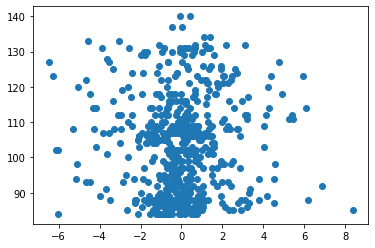

In [173]:
#labels = y
#features = x
print(features[:,0].size, labels.size)
scatter(features[:,3],labels)


In [174]:

# Import tools needed for visualization

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'

In [185]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [187]:
#Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SubCortGrayVol       Importance: 0.36
Variable: TotalGrayVol         Importance: 0.31
Variable: CortexVol            Importance: 0.3
Variable: GenderTwin           Importance: 0.03


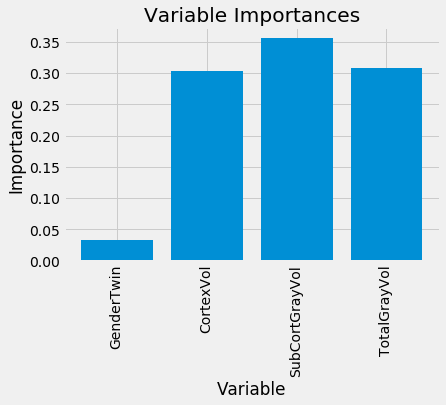

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');